In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [3]:
train=pd.read_csv(r"C:\Users\Dhwani\Desktop\Datasets\house-prices-advanced-regression-techniques\train.csv")
test=pd.read_csv(r"C:\Users\Dhwani\Desktop\Datasets\house-prices-advanced-regression-techniques\test.csv")

Text(0.5, 0, 'GrLivArea')

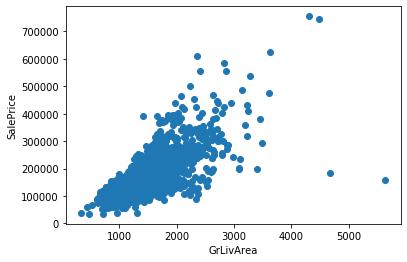

In [4]:
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea")

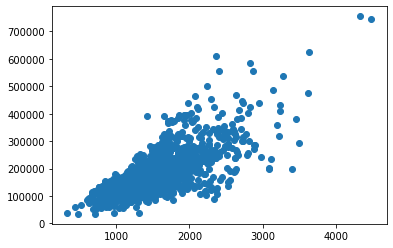

In [5]:
train=train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

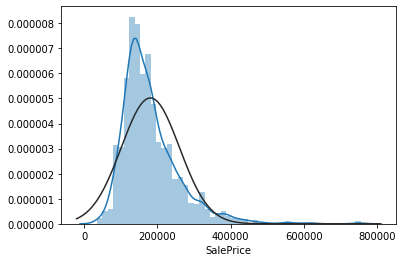

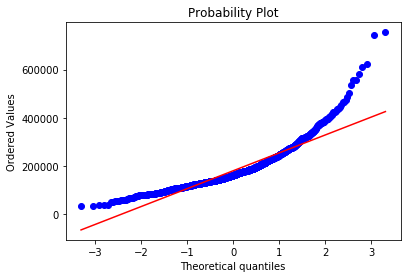

In [6]:
sns.distplot(train['SalePrice'], fit=norm);

fig=plt.figure()
res=stats.probplot(train['SalePrice'], plot=plt)
plt.show()

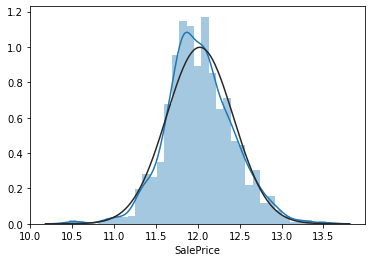

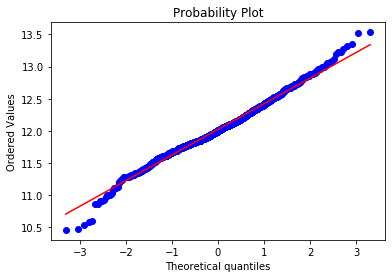

In [7]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'], fit=norm)

fig=plt.figure()
res=stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [8]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.SalePrice.values
data=pd.concat((train, test)).reset_index(drop=True)
data.drop('SalePrice', axis=1, inplace=True)
data.head()

C:\Users\Dhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [9]:
data_null=(data.isnull().sum()/len(data)*100)
data_null=data_null.drop(data_null[data_null==0].index).sort_values(ascending=False)
data_null

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageQual       5.450806
GarageCond       5.450806
GarageFinish     5.450806
GarageYrBlt      5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Utilities        0.068564
Functional       0.068564
Electrical       0.034282
BsmtUnfSF        0.034282
Exterior1st      0.034282
Exterior2nd      0.034282
TotalBsmtSF      0.034282
GarageArea       0.034282
GarageCars       0.034282
BsmtFinSF2       0.034282
BsmtFinSF1       0.034282
KitchenQual      0.034282
SaleType         0.034282
dtype: float64

In [10]:
data=data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

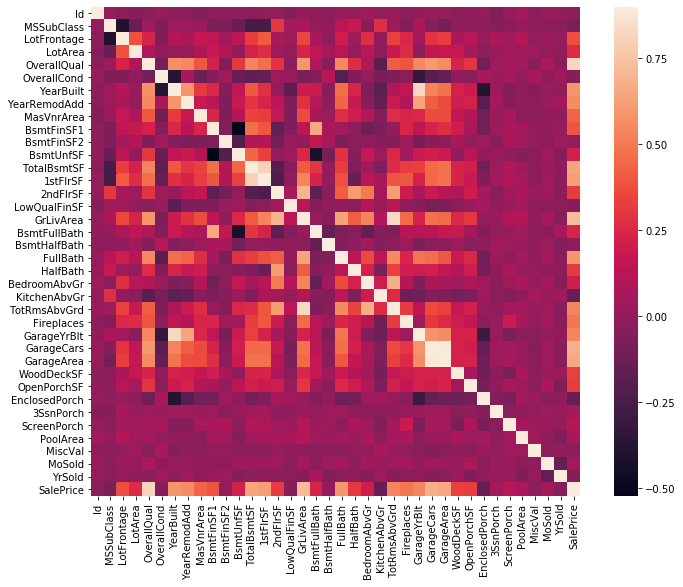

In [11]:
corrmat=train.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [12]:
data['LotFrontage']=data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col]=data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col]=data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col]=data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col]=data[col].fillna('None')
data["MasVnrType"]=data["MasVnrType"].fillna("None")
data["MasVnrArea"]=data["MasVnrArea"].fillna(0)
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data["Functional"]=data["Functional"].fillna("Typ")
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior1st']=data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd']=data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType']=data['SaleType'].fillna(data['SaleType'].mode()[0])
data['MSSubClass']=data['MSSubClass'].fillna("None")

In [13]:
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [14]:
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl=LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c]=lbl.transform(list(data[c].values))
   
print('Shape data: {}'.format(data.shape))

Shape data: (2917, 75)


In [15]:
data['TotalSF']=data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [16]:
# Skew Features

numeric_feats=data.dtypes[data.dtypes!='object'].index
skewed_features=data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness=pd.DataFrame({'Skewness':skewed_features})
skewness

,Skewness
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [50]:
print(skewness)

                Skewness
MiscVal        21.939672
PoolArea       17.688664
LotArea        13.109495
LowQualFinSF   12.084539
3SsnPorch      11.372080
LandSlope       4.973254
KitchenAbvGr    4.300550
BsmtFinSF2      4.144503
EnclosedPorch   4.002344
ScreenPorch     3.945101
BsmtHalfBath    3.929996
MasVnrArea      2.621719
OpenPorchSF     2.529358
WoodDeckSF      1.844792
1stFlrSF        1.257286
LotFrontage     1.103039
GrLivArea       1.068750
TotalSF         1.009157
BsmtFinSF1      0.980645
BsmtUnfSF       0.919688
2ndFlrSF        0.861556
TotRmsAbvGrd         NaN
Fireplaces           NaN
HalfBath             NaN
TotalBsmtSF          NaN
BsmtFullBath         NaN
OverallCond          NaN
HeatingQC            NaN
BedroomAbvGr         NaN
GarageArea           NaN
OverallQual          NaN
FullBath             NaN
MSSubClass           NaN
YrSold               NaN
BsmtFinType1         NaN
Id                   NaN
GarageCars           NaN
YearRemodAdd         NaN
BsmtQual             NaN


In [17]:
skewness=skewness[abs(skewness) > 0.75]

from scipy.special import boxcox1p
skewed_features=skewness.index
lam = 0.15
for feat in skewed_features:
    data[feat]=boxcox1p(data[feat], lam)

In [18]:
data=pd.get_dummies(data)

In [19]:
train=data[:ntrain]
test=data[ntrain:]

In [30]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [31]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [32]:
score=rmsle_cv(lasso)
score.mean()

0.11115132239966363

In [51]:
lasso.fit(train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lasso',
                 Lasso(alpha=0.0005, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=1, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [52]:
y_predictions=lasso.predict(test)
print(y_predictions)

[11.68173509 11.93739151 12.12590757 ... 12.06789232 11.66932292
 12.32900169]


In [39]:
predictions = np.expm1(lasso.predict(test))
print(predictions)

[118388.47386076 152876.39098336 184591.79488634 ... 174187.32538998
 116928.08548607 226159.83581532]


In [47]:
df=pd.read_csv(r"C:\Users\Dhwani\Desktop\Datasets\house-prices-advanced-regression-techniques\test.csv")
df['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
        ... 
1429    2890
1430    2891
1431    2892
1432    2893
1433    2894
1434    2895
1435    2896
1436    2897
1437    2898
1438    2899
1439    2900
1440    2901
1441    2902
1442    2903
1443    2904
1444    2905
1445    2906
1446    2907
1447    2908
1448    2909
1449    2910
1450    2911
1451    2912
1452    2913
1453    2914
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [40]:
print(len(y_predictions))
print(len(test))

1459
1459


In [49]:
house_prices_submission=pd.DataFrame()
house_prices_submission['Id']=df['Id']
house_prices_submission['SalePrice']=p
house_prices_submission.to_csv("./house_prices_submission.csv", index=False)